# Naive Bayes Gaussian - Iris flower data set  - Quantopian version
Modified by *Carlos Alfonso Gómez Hernández*

In [1]:
import numpy as np
import matplotlib.pyplot as plt

The Iris flower data set contains a set of 150 records 4 attributes Sepal Length , Sepal Width, Petal Length ,Petal Width and and fith value for  the class. 
* https://en.wikipedia.org/wiki/Iris_flower_data_set
* https://archive.ics.uci.edu/ml/datasets/iris
* http://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html
* http://scikit-learn.org/stable/modules/naive_bayes.html

In [2]:
from sklearn import datasets
iris = datasets.load_iris()

In [4]:
X = iris.data

#label = [x[4] for x in iris]

y = [] 
color = [] 
for i in range(len(iris.target)):
    if iris.target[i] == 0: #'Iris-setosa':
        color.append('red')
        y.append(0)
    elif iris.target[i] == 1:#'Iris-versicolor':
        color.append('green')
        y.append(1)
    else:
        color.append('blue')
        y.append(2)

y = np.array(y)

In [5]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

## First we need to explore the data visualy

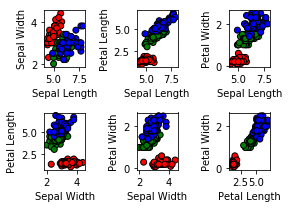

In [56]:
plt.subplot(2, 3, 1)
plt.scatter(X[:, 0], X[:, 1], c=color, edgecolor='k') 
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

plt.subplot(2, 3, 2)
plt.scatter(X[:, 0], X[:, 2], c=color, edgecolor='k') 
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')

plt.subplot(2, 3, 3)
plt.scatter(X[:, 0], X[:, 3], c=color, edgecolor='k') 
plt.xlabel('Sepal Length')
plt.ylabel('Petal Width')

plt.subplot(2, 3, 4)
plt.scatter(X[:, 1], X[:, 2], c=color, edgecolor='k') 
plt.xlabel('Sepal Width')
plt.ylabel('Petal Length')

plt.subplot(2, 3, 5)
plt.scatter(X[:, 1], X[:, 3], c=color, edgecolor='k') 
plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')

plt.subplot(2, 3, 6)
plt.scatter(X[:, 2], X[:, 3], c=color, edgecolor='k') 
plt.xlabel('Petal Length')
plt.ylabel('Petal Width');

# Avoid overlaps
plt.rcParams["figure.figsize"] = (3,4)
plt.tight_layout()

## We load the Gaussian Naive Bayes model

In [57]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

## Now we review how the GaussianNB clasifiers using one variable work

Using only 'Sepal Length'

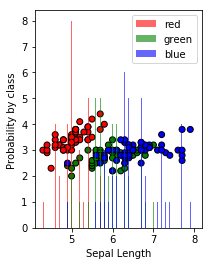

Using only Number of mislabeled points out of a total 150 points : 41 (27 % error)


In [58]:
x = X[:,0]

mask = (y == 0)
xr = x[mask]

mask = (y == 1)
xg = x[mask]

mask = (y == 2)
xb = x[mask]

xlim = (4.3, 8)
bins = np.linspace(xlim[0], xlim[1], 200)

plt.scatter(X[:, 0], X[:, 1], c=color, edgecolor='k') 
plt.hist(xr, bins, alpha=0.6,  histtype='stepfilled', label='red',  color='red')
plt.hist(xg, bins, alpha=0.6,  histtype='stepfilled', label='green', color='green' )
plt.hist(xb, bins, alpha=0.6,  histtype='stepfilled', label='blue',color='blue')
plt.legend(loc='upper right')
plt.xlabel('Sepal Length')
plt.ylabel('Probability by class ')
plt.show()

x = np.array([[v,v] for v in  X[:,0]])
y_pred = gnb.fit(x, y).predict(x)
correct = (y != y_pred).sum() 
percent =  float(correct) / len(x) * 100.0
print("Using only Number of mislabeled points out of a total %d points : %d (%d %% error)"%(len(x),correct,percent))

Using only 'Sepal Width'

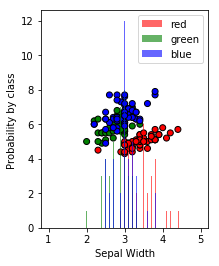

Using only Number of mislabeled points out of a total 150 points : 68 (45 % error)


In [59]:
x = X[:,1]

mask = (y == 0)
xr = x[mask]

mask = (y == 1)
xg = x[mask]

mask = (y == 2)
xb = x[mask]

xlim = (1, 5)
bins = np.linspace(xlim[0], xlim[1], 200)

plt.scatter(X[:, 1], X[:, 0], c=color, edgecolor='k') 
plt.hist(xr, bins, alpha=0.6,  histtype='stepfilled', label='red',  color='red')
plt.hist(xg, bins, alpha=0.6,  histtype='stepfilled', label='green', color='green' )
plt.hist(xb, bins, alpha=0.6,  histtype='stepfilled', label='blue', color='blue')
plt.legend(loc='upper right')
plt.xlabel('Sepal Width')
plt.ylabel('Probability by class ')
plt.show()

x = np.array([[v,v] for v in  X[:,1]])
y_pred = gnb.fit(x, y).predict(x)
correct = (y != y_pred).sum() 
percent =  float(correct) / len(x) * 100.0
print("Using only Number of mislabeled points out of a total %d points : %d (%d %% error)"  % (len(x),correct,percent))

Using only 'Petal Width'

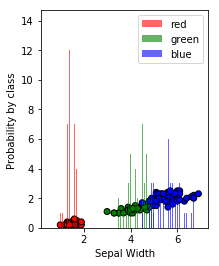

Using only Number of mislabeled points out of a total 150 points : 7 (4 % error)


In [60]:
x = X[:,2]

mask = (y == 0)
xr = x[mask]

mask = (y == 1)
xg = x[mask]

mask = (y == 2)
xb = x[mask]

xlim = (0.5, 7)
bins = np.linspace(xlim[0], xlim[1], 200)

plt.scatter(X[:, 2], X[:, 3], c=color, edgecolor='k') 
plt.hist(xr, bins, alpha=0.6,  histtype='stepfilled', label='red',  color='red')
plt.hist(xg, bins, alpha=0.6,  histtype='stepfilled', label='green', color='green' )
plt.hist(xb, bins, alpha=0.6,  histtype='stepfilled', label='blue', color='blue')
plt.legend(loc='upper right')
plt.xlabel('Sepal Width')
plt.ylabel('Probability by class ')
plt.show()

x = np.array([[v,v] for v in  X[:,2]])
y_pred = gnb.fit(x, y).predict(x)
correct = (y != y_pred).sum() 
percent =  float(correct) / len(x) * 100.0
print("Using only Number of mislabeled points out of a total %d points : %d (%d %% error)"  % (len(x),correct,percent))

Using only 'Petal Width'

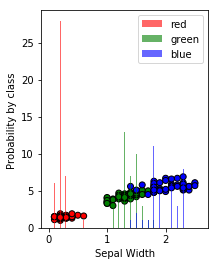

Using only Number of mislabeled points out of a total 150 points : 6 (4 % error)


In [61]:
x = X[:,3]

mask = (y == 0)
xr = x[mask]

mask = (y == 1)
xg = x[mask]

mask = (y == 2)
xb = x[mask]

xlim = (0, 2.6)
bins = np.linspace(xlim[0], xlim[1], 200)

plt.scatter(X[:, 3], X[:, 2], c=color, edgecolor='k') 
plt.hist(xr, bins, alpha=0.6,  histtype='stepfilled', label='red',  color='red')
plt.hist(xg, bins, alpha=0.6,  histtype='stepfilled', label='green', color='green' )
plt.hist(xb, bins, alpha=0.6,  histtype='stepfilled', label='blue', color='blue')
plt.legend(loc='upper right')
plt.xlabel('Sepal Width')
plt.ylabel('Probability by class ')
plt.show()

x = np.array([[v,v] for v in  X[:,3]])
y_pred = gnb.fit(x, y).predict(x)
correct = (y != y_pred).sum() 
percent =  float(correct) / len(x) * 100.0
print("Using only Number of mislabeled points out of a total %d points : %d (%d %% error)"  % (len(x),correct,percent))


Now we review how the Gaussian Naive Bayes clasifiers using two variables work

In [63]:
x = X[:,0:2]
y_pred = gnb.fit(x, y).predict(x)
correct = (y != y_pred).sum() 
percent =  float(correct) / len(x) * 100.0
print("Using only Number of mislabeled points out of a total %d points : %d (%d %% error)"  % (len(x),correct,percent))

x = X[:,[0,2]]
y_pred = gnb.fit(x, y).predict(x)
correct = (y != y_pred).sum() 
percent =  float(correct) / len(x) * 100.0
print( "Using only Number of mislabeled points out of a total %d points : %d (%d %% error)"  % (len(x),correct,percent))

x = X[:,[0,3]]
y_pred = gnb.fit(x, y).predict(x)
correct = (y != y_pred).sum() 
percent =  float(correct) / len(x) * 100.0
print "Using only Number of mislabeled points out of a total %d points : %d (%d %% error)"  % (len(x),correct,percent)

x = X[:,1:3]
y_pred = gnb.fit(x, y).predict(x)
correct = (y != y_pred).sum() 
percent =  float(correct) / len(x) * 100.0
print "Using only Number of mislabeled points out of a total %d points : %d (%d %% error)"  % (len(x),correct,percent)

x = X[:,[1,3]]
y_pred = gnb.fit(x, y).predict(x)
correct = (y != y_pred).sum() 
percent =  float(correct) / len(x) * 100.0
print "Using only Number of mislabeled points out of a total %d points : %d (%d %% error)"  % (len(x),correct,percent)

x = X[:,2:4]
y_pred = gnb.fit(x, y).predict(x)
correct = (y != y_pred).sum() 
percent =  float(correct) / len(x) * 100.0
print "Using only Number of mislabeled points out of a total %d points : %d (%d %% error)"  % (len(x),correct,percent)

Using only Number of mislabeled points out of a total 150 points : 33 (22 % error)
Using only Number of mislabeled points out of a total 150 points : 13 (8 % error)
Using only Number of mislabeled points out of a total 150 points : 6 (4 % error)
Using only Number of mislabeled points out of a total 150 points : 12 (8 % error)
Using only Number of mislabeled points out of a total 150 points : 8 (5 % error)
Using only Number of mislabeled points out of a total 150 points : 6 (4 % error)


Now we are going to illustrate how the Gaussian Naive Bayes clasifier using only the first two attributes Sepal Length and Sepal Width  work

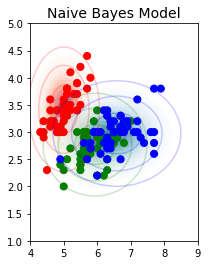

In [64]:
x = X[:,0:2]
     
fig, ax = plt.subplots()
ax.scatter(x[:,0], x[:,1],  c=color, s=50);
ax.set_title('Naive Bayes Model', size=14)
xlim = (4, 9)
ylim = (1, 5)

xg = np.linspace(xlim[0], xlim[1], 80)
yg = np.linspace(ylim[0], ylim[1], 80)
xx, yy = np.meshgrid(xg, yg)
Xgrid = np.vstack([xx.ravel(), yy.ravel()]).T

for l, c in enumerate(['red', 'green','blue']):
    mask = (y == l)
    mu, std = x[mask].mean(0), x[mask].std(0)
    P = np.exp(-0.5 * (Xgrid - mu) ** 2 / std ** 2).prod(1)
    Pm = np.ma.masked_array(P, P < 0.03)
    ax.pcolorfast(xg, yg, Pm.reshape(xx.shape), alpha=0.5,
                  cmap=c.title() + 's')
    ax.contour(xx, yy, P.reshape(xx.shape),
               levels=[0.01, 0.1, 0.5, 0.9],
               colors=c, alpha=0.2)
    
ax.set(xlim=xlim, ylim=ylim);

Number of mislabeled points out of a total 150 points : 33


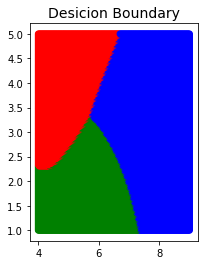

In [65]:
x = X[:,0:2]
ymesh = gnb.fit(x, y)

x0 =  np.linspace(4,9,160)
x1 =  np.linspace(1,5,160)
g = np.meshgrid(x0,x1)
xmesh = np.append(g[0].reshape(-1,1),g[1].reshape(-1,1),axis=1)

ymesh = gnb.predict(xmesh)

colormesh = [] 
for i in range(len(ymesh)):
    if ymesh[i] == 0:
        colormesh.append('red')
    elif ymesh[i] == 1:
        colormesh.append('green')
    else:
        colormesh.append('blue')

   
plt.scatter(xmesh[:, 0], xmesh[:, 1], c=colormesh )
plt.title('Desicion Boundary', size=14)

y_pred = gnb.predict(x)
print "Number of mislabeled points out of a total %d points : %d" % (len(X),(y != y_pred).sum())

We are going to illustrate how the Gaussian Naive Bayes clasifier using only the last two attributes Petal Length and Petal Width work

NameError: name 'x_hist' is not defined

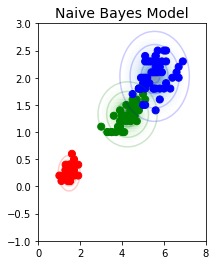

In [66]:
x = X[:,2:4]
       
fig, ax = plt.subplots()
ax.scatter(x[:,0], x[:,1],  c=color, s=50);
ax.set_title('Naive Bayes Model', size=14)
xlim = (0, 8)
ylim = (-1, 3)

xg = np.linspace(xlim[0], xlim[1], 160)
yg = np.linspace(ylim[0], ylim[1], 80)
xx, yy = np.meshgrid(xg, yg)
Xgrid = np.vstack([xx.ravel(), yy.ravel()]).T

for l, c in enumerate(['red', 'green','blue']):
    mask = (y == l)
    mu, std = x[mask].mean(0), x[mask].std(0)
    P = np.exp(-0.5 * (Xgrid - mu) ** 2 / std ** 2).prod(1)
    Pm = np.ma.masked_array(P, P < 0.03)
    ax.pcolorfast(xg, yg, Pm.reshape(xx.shape), alpha=0.5,
                  cmap=c.title() + 's')
    ax.contour(xx, yy, P.reshape(xx.shape),
               levels=[0.01, 0.1, 0.5, 0.9],
               colors=c, alpha=0.2)
    
ax.set(xlim=xlim, ylim=ylim);


x_hist.invert_yaxis()

Number of mislabeled points out of a total 150 points : 6


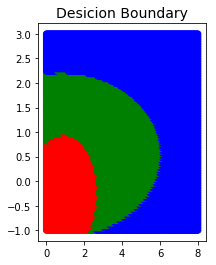

In [67]:
x = X[:,2:4]
ymesh = gnb.fit(x, y)

x0 =  np.linspace(0,8,160)
x1 =  np.linspace(-1,3,80)
g = np.meshgrid(x0,x1)
xmesh = np.append(g[0].reshape(-1,1),g[1].reshape(-1,1),axis=1)

ymesh = gnb.predict(xmesh)

colormesh = [] 
for i in range(len(ymesh)):
    if ymesh[i] == 0:
        colormesh.append('red')
    elif ymesh[i] == 1:
        colormesh.append('green')
    else:
        colormesh.append('blue')

   
plt.scatter(xmesh[:, 0], xmesh[:, 1], c=colormesh )
plt.title('Desicion Boundary', size=14)

y_pred = gnb.predict(x)
print "Number of mislabeled points out of a total %d points : %d" % (len(X),(y != y_pred).sum())

The Gaussian Naive Bayes clasifier using the four attributes is not better than the Naive Bayes clasifier that uses only the Petal Width

In [68]:
y_pred = gnb.fit(X, y).predict(X)
print "Number of mislabeled points out of a total %d points : %d" % (len(X),(y != y_pred).sum())

Number of mislabeled points out of a total 150 points : 6
